# Execute the code below
You will get a passenger list of the titanic.

In [ ]:
import pandas as pd

In [ ]:
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/titanic.csv"
df_titanic = pd.read_csv(link)
df_titanic['Survived'] = df_titanic['Survived'].apply(lambda x: "Survived" if x == 1 else "Dead")
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,Dead,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,Survived,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,Dead,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


# Data preparation

What are the "type" of each column? Are there non-numeric columns?

In [ ]:
# What are the "type" of each column?
df_titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    object 
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 55.6+ KB


Then, make a first exploration (pairplots, correlation heatmaps, etc...) of the dataset

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
fig = px.scatter_matrix(data_frame = df_titanic,
                        dimensions = df_titanic[df_titanic.columns.difference(["Name","Survived","Sex","Survived_fact"])],
                        height = 1000,
                        width = 1000,
                        color = df_titanic["Survived"])
fig.show()

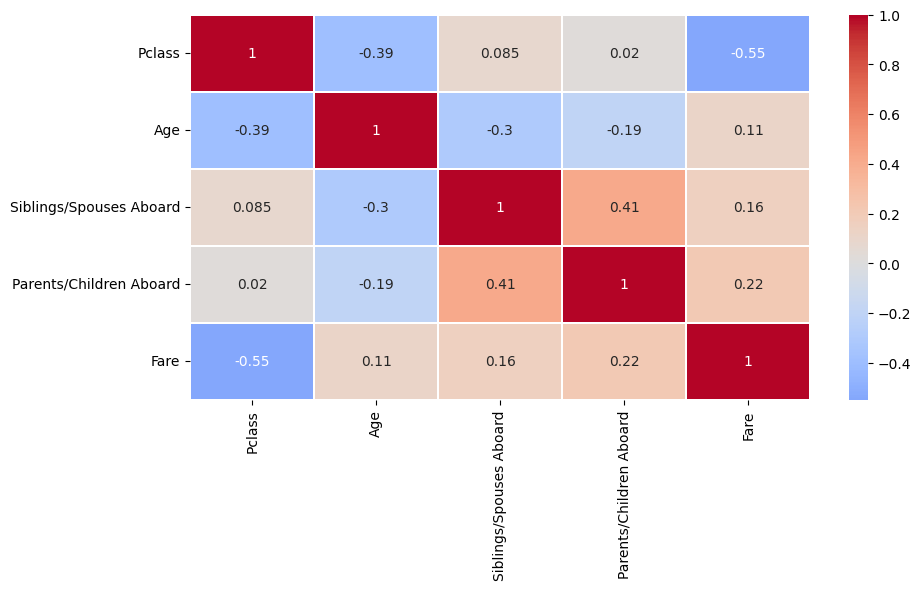

In [ ]:
# First exploration:
fig, ax = plt.subplots(figsize = (10,5))
sns.heatmap(df_titanic.corr(numeric_only=True), center = 0, cmap= "coolwarm",annot = True,
            linewidths=0.01)
plt.show()

You are looking for Jack. How many people named Jack on board?

In [ ]:
# How many people named Jack on board?
df_titanic['Name'][df_titanic['Name'].str.contains("Jack ")].value_counts()

Name
Dr. Arthur Jackson Brewe    1
Name: count, dtype: int64

# Logistic regression

Today, in this quest, you have an extraordinary power: you can travel in time to try to save some passengers.
You obviously wanted to save Jack. But you didn't find his name on the list. He probably travels under a false name...
Too bad, thanks to this trip, you will still try to save as many people as possible. To do this, you have to identify the people who are most probably going to die.

- Select features (X) with only numeric values, and without "Survived" column
- Select "Survived" column as target (y)
- Split your data with **random_state = 36**
- Train a logistic regression
- Print the accuracy score on the train set and on the test set. Is there overfitting?
- Print the Confusion Matrix on the test set
- How many iterations were needed to train this model?

In [ ]:
# It's up to you:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df_titanic[['Pclass','Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare']]
y = df_titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 36, train_size = 0.75)

model = LogisticRegression().fit(X_train,y_train)

model.score(X_train, y_train), model.score(X_test, y_test)



(0.718796992481203, 0.6441441441441441)

Confusion Matrix on Test Set:
[[109  20]
 [ 59  34]]


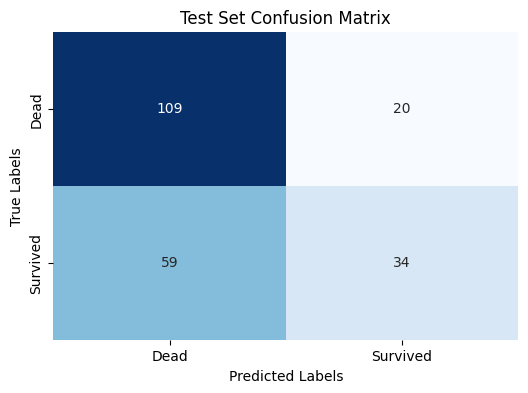

In [ ]:
from sklearn.metrics import confusion_matrix
# Prédire sur l'ensemble de test
test_predictions = model.predict(X_test)

# Calculer la matrice de confusion pour l'ensemble de test
test_conf_matrix = confusion_matrix(y_test, test_predictions)

# Imprimer la matrice de confusion pour l'ensemble de test
print("Confusion Matrix on Test Set:")
print(test_conf_matrix)

# Tracer la matrice de confusion pour l'ensemble de test
plt.figure(figsize=(6, 4))
sns.heatmap(test_conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=["Dead", "Survived"], yticklabels=["Dead", "Survived"])
plt.title("Test Set Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Model improvement

With your fancy time machine, you can, and you will save all the people that the model will predict as dead. But you won't save people predicted as "survived" (because it's not necessary). So change the weights of the classes to be very careful: your goal is to save all the people at risk. So, in this case, it's better to have "actual survived" peopple predicted as death, because you'll save them anyway. Otherwise, "actual death" predicted as survived won't be saved by your time machine.
- Change the weight of the classes
- Fit the model on train set
- Print the accuracy score on the train set and on the test set
- Print the Confusion Matrix on the test set, you must have no deaths that have been predicted as "Survived".

In [ ]:
model.classes_

array(['Dead', 'Survived'], dtype=object)

In [ ]:
X = df_titanic[['Pclass','Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare']]
y = df_titanic['Survived']

for classweight in [5, 10, 15]:
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 36, train_size = 0.75)
        model = LogisticRegression(class_weight = {'Dead': classweight})
        model.fit(X_train,y_train)
        print("Pour un 'Class weight = Dead' est de ",classweight,", les scores sont de :",model.score(X_train, y_train), model.score(X_test, y_test))


Pour un 'Class weight = Dead' est de  5 , les scores sont de : 0.6511278195488722 0.5900900900900901
Pour un 'Class weight = Dead' est de  10 , les scores sont de : 0.6300751879699248 0.5900900900900901
Pour un 'Class weight = Dead' est de  15 , les scores sont de : 0.6255639097744361 0.5855855855855856


In [ ]:
for classweight in [5, 10, 15]:
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 36, train_size = 0.75)
        model = LogisticRegression(class_weight = {'Survived': classweight})
        model.fit(X_train,y_train)
        print("Pour un 'Class weight = Survived' est de ",classweight,"les scores sont de :",model.score(X_train, y_train), model.score(X_test, y_test))

Pour un 'Class weight = Survived' est de  5 les scores sont de : 0.5142857142857142 0.4594594594594595
Pour un 'Class weight = Survived' est de  10 les scores sont de : 0.41353383458646614 0.44144144144144143
Pour un 'Class weight = Survived' est de  15 les scores sont de : 0.39398496240601505 0.42792792792792794


Confusion Matrix on Test Set:
[[129   0]
 [ 91   2]]


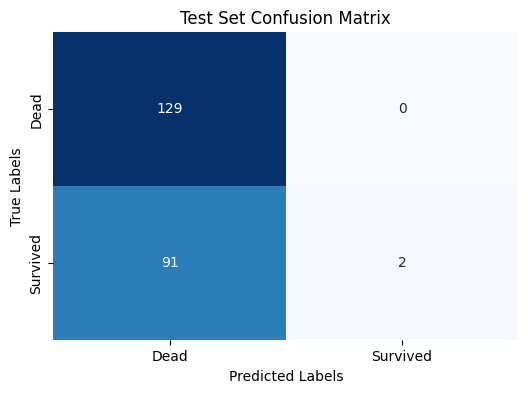

In [ ]:
model = LogisticRegression(class_weight = {'Dead' : 10})
model.fit(X_train,y_train)

test_predictions = model.predict(X_test)
test_conf_matrix = confusion_matrix(y_test, test_predictions)

print("Confusion Matrix on Test Set:")
print(test_conf_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(test_conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=["Dead", "Survived"], yticklabels=["Dead", "Survived"])
plt.title("Test Set Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# People most at risk

You are looking for people most at risk.
- Compute the prediction probabilities **on your test set**
- Which column is about "survived" probability?
- Among the previous prediction probability array, select only the column corresponding to the "Survived" probability
- Display the passengers by sorting  most likely to survive first (`sorted_values()` method?)

In [ ]:
X_test

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
346,3,3.0,1,1,15.9000
458,3,34.0,0,0,8.0500
878,3,22.0,0,0,10.5167
618,1,42.0,1,0,52.5542
178,3,36.0,0,0,0.0000
...,...,...,...,...,...
345,3,34.0,1,0,16.1000
693,3,44.0,0,0,8.0500
423,2,28.0,1,0,26.0000
19,3,22.0,0,0,7.2250


In [ ]:
df_merge = pd.merge(X_test,df_titanic,how='inner', left_index=True, right_index=True)
df_merge = df_merge[['Name','Pclass_x','Survived']]
df_merge

,Name,Pclass_x,Survived
346,Master. William Loch Coutts,3,Survived
458,Mr. William Morley,3,Dead
878,Miss. Gerda Ulrika Dahlberg,3,Dead
618,Mr. Edwin Nelson Jr Kimball,1,Survived
178,Mr. Lionel Leonard,3,Dead
...,...,...,...
345,Mrs. Thomas Henry (Mary E Finck) Davison,3,Survived
693,Mr. James Kelly,3,Dead
423,Mrs. Charles V (Ada Maria Winfield) Clarke,2,Survived
19,Mrs. Fatima Masselmani,3,Survived


In [ ]:
df_merge.reset_index(drop=True, inplace=True)

In [ ]:
model.classes_

array(['Dead', 'Survived'], dtype=object)

In [ ]:
df_survival = pd.DataFrame(model.predict_proba(X_test), columns=model.classes_)
df_survival.drop(columns='Dead', inplace=True)
df_survival.rename(columns={'Survived':'Probabilité de Survie'}, inplace=True)
df_total = pd.merge(df_merge,df_survival,how='inner', left_index=True, right_index=True)

df_final = df_total.sort_values(by="Probabilité de Survie", ascending=False)
df_final


,Name,Pclass_x,Survived,Probabilité de Survie
34,Master. Hudson Trevor Allison,1,Survived,0.691707
123,Mr. John Borland Jr Thayer,1,Survived,0.531570
73,Miss. Emily Borie Ryerson,1,Survived,0.489728
203,Mr. Harry Elkins Widener,1,Dead,0.473628
67,Mr. Gustave J Lesurer,1,Survived,0.431122
...,...,...,...,...
179,Mr. George John Jr Sage,3,Dead,0.009368
198,Mr. Johan Svensson Lundahl,3,Dead,0.007593
134,Mrs. (Hedwig) Turkula,3,Survived,0.004099
126,Mr. James Webber,3,Dead,0.003490


# Bonus - Model improvement, under constraint

Your time travel boss tells you that there's a budget cut. You now can only save 120 people max. Not one more.

If your model predicts as "dead" someone who would have survived in reality. You then "save" that person, who would have survived even without your time-traveling help. And you take the place of someone who could have been saved. That's not optimal.

Select the 120 people with the highest probability of dying. Of these, how many actually survived?

In [ ]:
# It's up to you:


# Bonus - More predictions

Does the Reverend "Rev. Juozas Montvila" have a better chance of survival than "Mrs. William (Margaret Norton) Rice"?
- Filter the initial DataFrame to get only the 2 rows with the 2 persons above, and only columns present in your variables (X)
- Make a prediction with probability for this 2 people
- Which one has a better chance to survive?
